# Term frequency–Inverse document frequency (TFIDF).

In [ ]:
import pandas as pd
df = pd.DataFrame()
Word="The Car Truck is Driven on Road Highway".split(" ")
A = [2/7, 1/7, 0, 1/7, 1/7,  1/7, 1/7, 0]
B = [2/7, 0, 1/7, 1/7, 1/7,  1/7, 0, 1/7]

df['Word']=Word
df['A'] = A
df['B'] = B
df

,Word,A,B
0,The,0.285714,0.285714
1,Car,0.142857,0.000000
2,Truck,0.000000,0.142857
3,is,0.142857,0.142857
4,Driven,0.142857,0.142857
5,on,0.142857,0.142857
6,Road,0.142857,0.000000
7,Highway,0.000000,0.142857


In [ ]:
#tf = relative frequency in document

idf = []


In [ ]:
import numpy as np

for index, row in df.iterrows():
    val = 0
    if row['A']>0:
        val+=1
    if row['B']>0:
        val+=1
    idf.append(np.log(2/val))
df['idf']=idf
df['tfidf_A'] = df['A']*df['idf']
df['tfidf_B'] = df['B']*df['idf']

In [ ]:
df

,Word,A,B,idf,tfidf_A,tfidf_B
0,The,0.285714,0.285714,0.000000,0.000000,0.000000
1,Car,0.142857,0.000000,0.693147,0.099021,0.000000
2,Truck,0.000000,0.142857,0.693147,0.000000,0.099021
3,is,0.142857,0.142857,0.000000,0.000000,0.000000
4,Driven,0.142857,0.142857,0.000000,0.000000,0.000000
5,on,0.142857,0.142857,0.000000,0.000000,0.000000
6,Road,0.142857,0.000000,0.693147,0.099021,0.000000
7,Highway,0.000000,0.142857,0.693147,0.000000,0.099021


<BarContainer object of 8 artists>

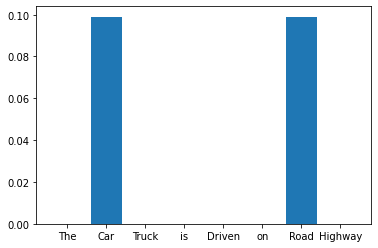

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df['Word'],df['tfidf_A'])

<BarContainer object of 8 artists>

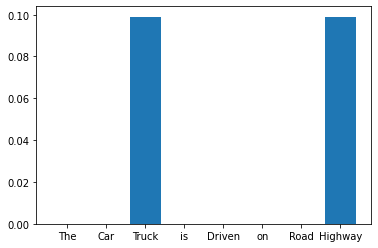

In [ ]:
plt.bar(df['Word'],df['tfidf_B'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(df)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
print (df)

         TF-IDF
idf         0.0
tfidf_a     0.0
tfidf_b     0.0
word        1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
S1 = 'The car is driven on the road'
S2 = 'The truck is driven on the highway'

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True)
response = vectorizer.fit_transform([S1,S2])

In [ ]:
print(response)

  (0, 5)	0.42471718586982765
  (0, 4)	0.30218977576862155
  (0, 1)	0.30218977576862155
  (0, 3)	0.30218977576862155
  (0, 0)	0.42471718586982765
  (0, 6)	0.6043795515372431
  (1, 2)	0.42471718586982765
  (1, 7)	0.42471718586982765
  (1, 4)	0.30218977576862155
  (1, 1)	0.30218977576862155
  (1, 3)	0.30218977576862155
  (1, 6)	0.6043795515372431


In [ ]:
# plt.hist(response)